In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv
import pandas as pd

# Diffraction limited PSF

$$I(\theta) = \frac {(2  J_1(x))^2}{x^2}$$

$$x = \frac {2\pi d_a \sin{\theta}}{2\lambda}$$

$\lambda$: wavelength in [mm]  
$d_a$: aperture diameter
$\theta$: angle in radians

In [4]:
def psf(theta, diameter_mm, lambda_mm):
    x = np.pi * diameter_mm * np.sin(theta)/lambda_mm
    I = (2 * jv(1, x)/x)**2
    return I

def get_fwhm(lambda_mm, dimeters):
    fwhms = np.rad2deg(1.025 * lambda_mm/diameters) * 60.
    return fwhms

In [5]:
diameters = 1e3 * np.array([4.5, 5.5])
THETA_MAX_ARCMIN = 10
LAMBDA_MM = 1.0
EE_THRESHOLDS = np.array([0.8, 0.9, 0.95, 0.97, 0.98])
theta_arcmin = np.linspace(0, THETA_MAX_ARCMIN, 1000); theta_arcmin[0]=1e-5
theta_rad = np.deg2rad(theta_arcmin/60.)

In [6]:
fwhms = get_fwhm(LAMBDA_MM, diameters)

(0.0, 2.5)

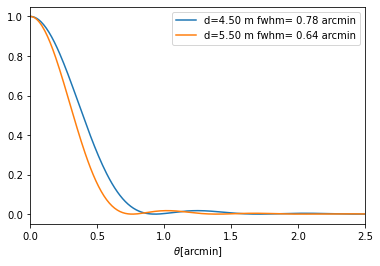

In [7]:
for j, diameter in enumerate(diameters):
    plt.plot(theta_arcmin, 
             psf(theta_rad,
                 diameter_mm=diameter,
                 lambda_mm=LAMBDA_MM),
             label='d=%1.2f m fwhm= %1.2f arcmin' % (diameter/1e3, fwhms[j]))
plt.legend();
plt.xlabel('$\\theta $[arcmin]');
plt.xlim([0, 2.5])

# FWHM

The full width at half max for a diffraction limited beam is given by:

$$ \theta_{FWHM} = 1.025 \frac{\lambda}{D}$$

Which gives

In [8]:
for j in range(len(diameters)):
    fwhms = np.rad2deg(1.025 * LAMBDA_MM/diameters) * 60.
    print("FWHM for D=%1.2f m at %1.2f mm:  %1.2f arcmin" % (diameters[j]/1e3, LAMBDA_MM, fwhms[j]))

FWHM for D=4.50 m at 1.00 mm:  0.78 arcmin
FWHM for D=5.50 m at 1.00 mm:  0.64 arcmin


# Encircled energies

The encircled energy within a disc of radius $\theta$ is given by the integral of the psf
$$L(\theta) \propto \int_0 ^ \theta \int_{0}^{2\pi} I(\theta) \theta d\theta d\psi  $$
This integral has a closed form for a circular aperture
$$L(\theta) = 1 - J_0^2(k a \sin(\theta)) - J_1^2(k a \sin \theta)$$

In [9]:
def get_ee(theta, diameter_mm, lambda_mm ):
    x = np.pi * diameter_mm * np.sin(theta)/lambda_mm
    L = 1 - jv(0, x)**2 - jv(1, x)**2
    return L

def get_x_given_y0s(x, y, y0s):
    xs_to_return = np.zeros(len(y0s))
    for j, y0 in enumerate(y0s):
        sel = y > y0
        xs_to_return[j] = x[sel][0]
    return xs_to_return

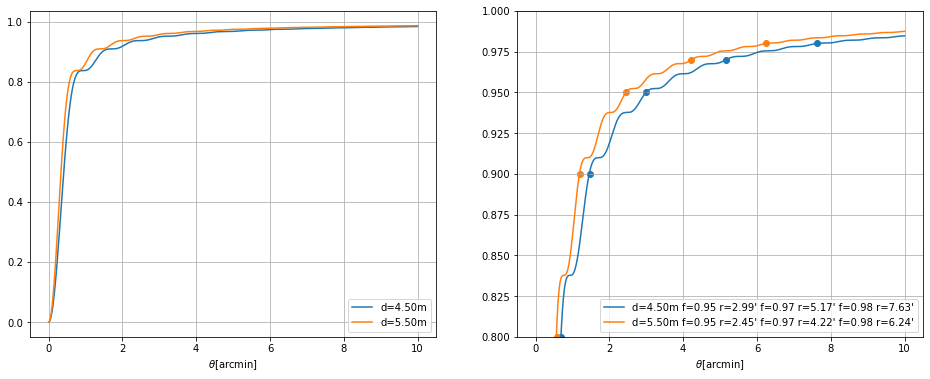

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 6])
fig.suptitle('')
theta_thresholds = []
for j, diameter in enumerate(diameters):
    ee = get_ee(theta_rad,diameter_mm=diameter, lambda_mm=LAMBDA_MM)
    threshold_locations = get_x_given_y0s(theta_arcmin, ee, EE_THRESHOLDS)
    theta_thresholds.append(threshold_locations)
    string = ["f=%1.2f r=%1.2f'" % (EE_THRESHOLDS[j], threshold_locations[j]) for j in range(2, 5)]
    string = " ".join(string)
    ax1.plot(theta_arcmin,
             ee,
             label='d=%1.2fm' % (diameter/1e3))
    ax2.plot(theta_arcmin, 
             ee,
             label='d=%1.2fm ' % (diameter/1e3) + string )
    ax2.scatter(threshold_locations, EE_THRESHOLDS)
ax1.grid()
ax2.grid()
ax2.set_ylim([0.8, 1.0])
ax1.legend();
ax2.legend();
ax1.set_xlabel('$\\theta $[arcmin]');
ax2.set_xlabel('$\\theta $[arcmin]');

In [11]:
columns = ["d=%1.2f m" %(diameter/1000) for diameter in diameters]
rows = ["th:%1.2f" %(threshold) for threshold in EE_THRESHOLDS]

In [12]:
df = pd.DataFrame(np.array(theta_thresholds).T,
                  columns=columns,
                  index=rows)

In [13]:
print("Radius [arcmin] at a given encircled energy"); df

Radius [arcmin] at a given encircled energy


,d=4.50 m,d=5.50 m
th:0.80,0.690691,0.570571
th:0.90,1.461461,1.191191
th:0.95,2.992993,2.452452
th:0.97,5.165165,4.224224
th:0.98,7.627628,6.236236
